In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Housing.csv")
print(data)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [3]:
price = data['price'].values.reshape(-1,1)

In [4]:
facility_data = data.iloc[:, 1:].to_numpy()
facility_data = np.where(facility_data == 'yes', 1, facility_data)
facility_data = np.where(facility_data == 'no', 0, facility_data)
facility_data = np.where(facility_data == 'furnished', 2, facility_data)
facility_data = np.where(facility_data == 'semi-furnished', 1, facility_data)
facility_data = np.where(facility_data == 'unfurnished', 0, facility_data)

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(facility_data, price, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [73]:
depth = 2

In [74]:
param_range = np.arange(1, depth + 1)

In [80]:
model = DecisionTreeRegressor(max_depth=depth, min_samples_split=3, random_state=42)

In [81]:
history = model.fit(X_train,y_train)

In [82]:
train_scores, test_scores = validation_curve(
    model,
    X_train,
    y_train,
    param_name="max_depth",
    param_range=param_range,
    scoring="r2", # R-squared is a common regression metric
    cv=10 # Number of cross-validation folds
)

In [83]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

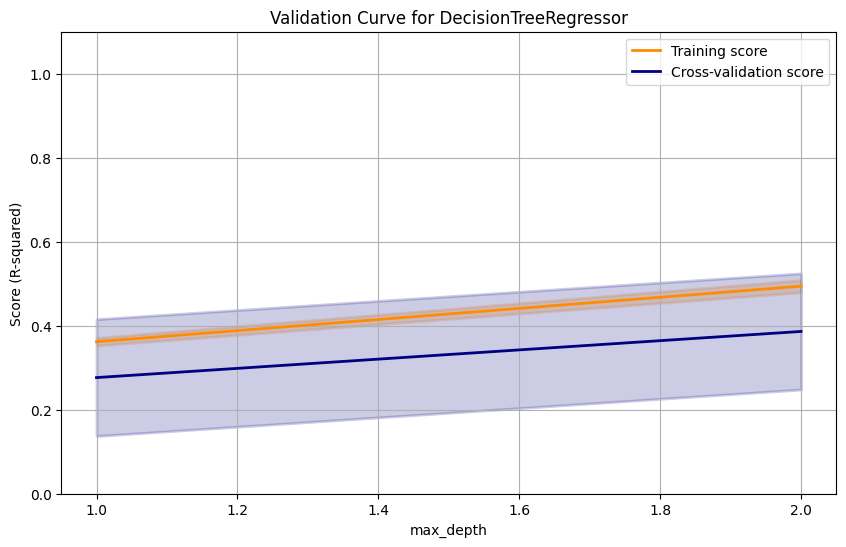

In [84]:
# 5. Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve for DecisionTreeRegressor")
plt.xlabel("max_depth")
plt.ylabel("Score (R-squared)")
plt.ylim(0.0, 1.1)
lw = 2

# Plot the training score curve
plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)

# Plot the validation score curve
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)

plt.legend(loc="best")
plt.grid(True)
plt.show()

In [85]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    return np.mean((y - y_pred) ** 2)

mse_val = evaluate_model(model, X_val, y_val)
mse_test = evaluate_model(model, X_test, y_test)

print(f'Validation MSE: {mse_val**0.5:.4f}')
print(f'Test MSE: {mse_test**0.5:.4f}')

Validation MSE: 2531838.1707
Test MSE: 2395543.6613


In [86]:
mse_train = evaluate_model(model, X_train, y_train)
print(f'Training MSE: {mse_train**0.5:.4f}')

Training MSE: 2165949.8849


In [87]:
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)
print(y_test)
print(y_test_pred)

[[ 2408000]
 [ 1750000]
 [ 5810000]
 [ 1750000]
 [ 5950000]
 [ 2520000]
 [ 4235000]
 [ 2450000]
 [ 8890000]
 [ 3255000]
 [ 2870000]
 [ 8190000]
 [ 2660000]
 [ 6685000]
 [ 4193000]
 [ 6790000]
 [ 5250000]
 [ 3773000]
 [ 4403000]
 [ 2660000]
 [ 6650000]
 [ 2940000]
 [ 3360000]
 [ 3353000]
 [ 3500000]
 [ 4795000]
 [ 6230000]
 [ 9800000]
 [ 3500000]
 [ 3360000]
 [ 4200000]
 [ 6860000]
 [ 3850000]
 [ 1890000]
 [ 3710000]
 [ 6440000]
 [ 4480000]
 [ 6650000]
 [ 6650000]
 [ 4270000]
 [ 3080000]
 [ 3570000]
 [ 2520000]
 [ 5145000]
 [ 5950000]
 [ 4900000]
 [ 6195000]
 [ 1890000]
 [ 5250000]
 [ 5110000]
 [ 5740000]
 [ 2660000]
 [ 6510000]
 [ 2660000]
 [ 5250000]
 [ 5110000]
 [ 4690000]
 [ 4620000]
 [ 3500000]
 [ 3675000]
 [ 2800000]
 [ 3675000]
 [ 6650000]
 [ 3087000]
 [ 7525000]
 [ 4550000]
 [10150000]
 [ 5810000]
 [ 3920000]
 [ 4060000]
 [ 3640000]
 [ 3640000]
 [ 4550000]
 [ 3150000]
 [ 8855000]
 [ 9800000]
 [ 5495000]
 [ 4620000]
 [12250000]
 [ 5250000]
 [ 3703000]
 [ 4165000]]
[3794280.985915

In [ ]:
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy")

plt.legend(loc="best")
plt.grid(True)
plt.show()